In [2]:
import os
import pandas as pd
import pycaret.classification as clf

import utils as my

## Monitoring & Check `history.csv`

### Training results

In [3]:
df_history = pd.read_csv("./models/history.csv")
# df_history = df_history.loc[df_history["LogLoss"] < 0.1, :]
my.show_history(df_history, mode="Train", sort_by=['Prec.', 'AUC'])

,17,11,15,19,7,1,3,5,9,13
Model,base,base,base,base,base,base,base,base,base,base
Accuracy,1.000000,0.951400,0.946200,0.941000,0.855900,0.845500,0.845500,0.845500,0.845500,0.852400
AUC,1.000000,0.994700,0.989200,0.989900,0.938200,0.933300,0.933300,0.933300,0.934800,0.936500
Recall,1.000000,0.890500,0.920400,0.925400,0.696500,0.686600,0.686600,0.686600,0.691500,0.825900
Prec.,1.000000,0.967600,0.925000,0.907300,0.864200,0.841500,0.841500,0.841500,0.837300,0.768500
F1,1.000000,0.927500,0.922700,0.916300,0.771300,0.756200,0.756200,0.756200,0.757500,0.796200
LogLoss,0.127400,0.260800,0.265800,0.269200,0.386100,0.367300,0.367300,0.367300,0.365400,0.360000
Tact,0:00:35,0:00:34,0:00:37,0:00:39,0:00:36,0:00:34,0:00:34,0:00:35,0:00:35,0:00:33
imputation_type,iterative,iterative,iterative,iterative,iterative,simple,simple,iterative,iterative,iterative
fix_imbalance,True,False,True,True,False,False,False,False,False,True


### Test restuls

In [4]:
df_history = pd.read_csv("./models/history.csv")
# df_history = df_history.loc[(df_history["LogLoss"] < 0.4) & (df_history["AUC"] > 0.8), :]
my.show_history(df_history, mode="Test", sort_by=['Prec.', 'AUC'])

,7,9,1,3,5,11,13,15,17,19
Model,base,base,base,base,base,base,base,base,base,base
Accuracy,0.770800,0.781200,0.776000,0.776000,0.776000,0.770800,0.750000,0.724000,0.724000,0.692700
AUC,0.796100,0.839200,0.840800,0.840800,0.840800,0.824700,0.830400,0.792700,0.818100,0.792600
Recall,0.567200,0.626900,0.626900,0.626900,0.626900,0.656700,0.731300,0.641800,0.686600,0.701500
Prec.,0.717000,0.711900,0.700000,0.700000,0.700000,0.676900,0.620300,0.597200,0.589700,0.546500
F1,0.633300,0.666700,0.661400,0.661400,0.661400,0.666700,0.671200,0.618700,0.634500,0.614400
LogLoss,0.513500,0.469700,0.469400,0.469400,0.469400,0.486000,0.497100,0.521300,0.490800,0.536600
Tact,0:00:36,0:00:35,0:00:34,0:00:34,0:00:35,0:00:34,0:00:33,0:00:37,0:00:35,0:00:39
imputation_type,iterative,iterative,simple,simple,iterative,iterative,iterative,iterative,iterative,iterative
fix_imbalance,False,False,False,False,False,False,True,True,True,True


## Metrics

In [6]:
dataset_path = "./pima_diabetes.csv"
target_name = "Outcome"
train_size = 0.75
seed = 111

train, test = my.get_data(dataset_path, train_size, seed, target_name=target_name)

Train Data: (576, 9)
Test  Data: (192, 9) 



### Default model (all default parameters)

Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._voting.VotingClassifier'>
>> Train scores:
   Model  Accuracy     AUC  Recall   Prec.      F1  LogLoss Tact
0          0.8455  0.9333  0.6866  0.8415  0.7562   0.3673     


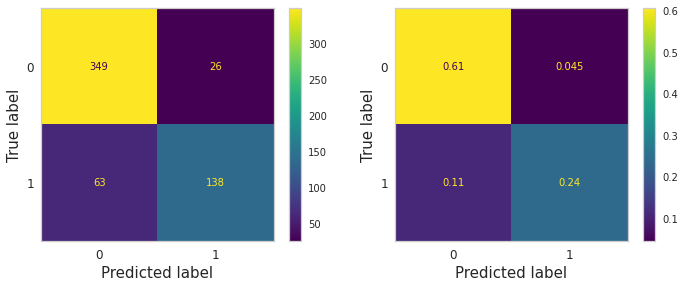

>> Test scores:
   Model  Accuracy     AUC  Recall  Prec.      F1  LogLoss Tact
0           0.776  0.8408  0.6269    0.7  0.6614   0.4694     


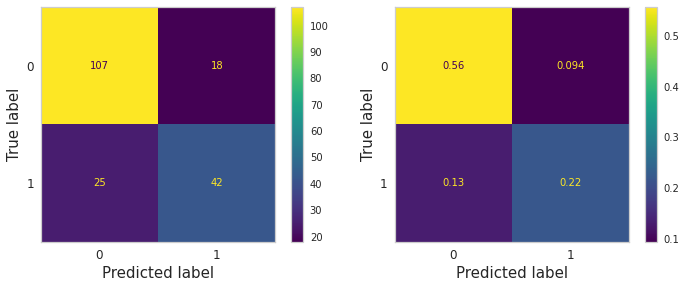

In [16]:
## Default model
model_name = "base__train__Accuracy-0.8455_AUC-0.9333__test__Accuracy-0.7760_AUC-0.8408__seed-111"
model = clf.load_model(os.path.join("./models", model_name))
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
# print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])

### Baseline model

Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._voting.VotingClassifier'>
>> Train scores:
   Model  Accuracy     AUC  Recall   Prec.      F1  LogLoss Tact
0          0.8455  0.9348  0.6915  0.8373  0.7575   0.3654     


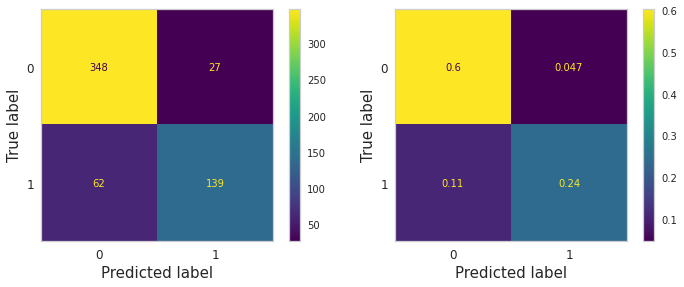

>> Test scores:
   Model  Accuracy     AUC  Recall   Prec.      F1  LogLoss Tact
0          0.7812  0.8392  0.6269  0.7119  0.6667   0.4697     


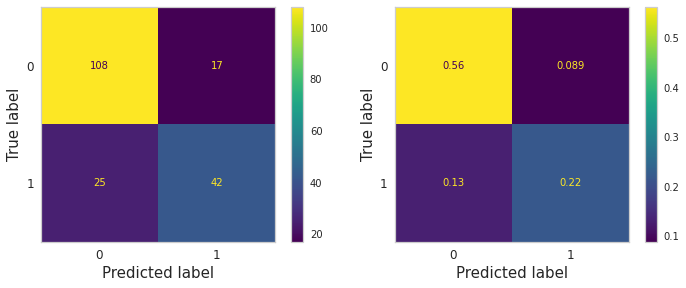

In [17]:
model_name = "base__train__Accuracy-0.8455_AUC-0.9348__test__Accuracy-0.7812_AUC-0.8392__seed-111"
model = clf.load_model(os.path.join("./models", model_name))
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
# print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])

### Tuned models

Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._forest.RandomForestClassifier'>
>> Train scores:
   Model  Accuracy  AUC  Recall  Prec.   F1  LogLoss Tact
0             1.0  1.0     1.0    1.0  1.0   0.1274     


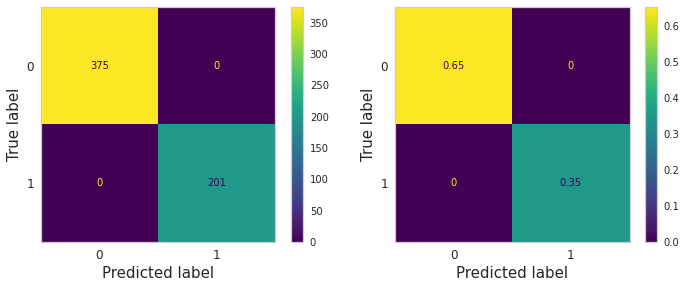

>> Test scores:
   Model  Accuracy     AUC  Recall   Prec.      F1  LogLoss Tact
0           0.724  0.8181  0.6866  0.5897  0.6345   0.4908     


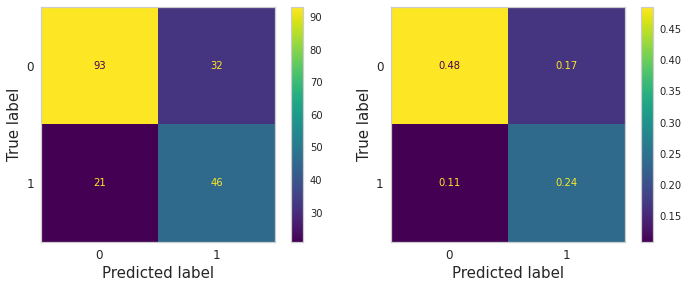

In [7]:
## Baseline model
model_name = "base__train__Accuracy-1.0000_AUC-1.0000__test__Accuracy-0.7240_AUC-0.8181__seed-111"
model = clf.load_model(os.path.join("./models", model_name))
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
# print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])